In [3]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
df=pd.read_csv("heart_statlog_cleveland_hungary_final.csv")
#Bu veri setinde kalp rahatsızlıklarının yaş,cinsiyet vb faktörlere göre dağılımını görüyoruz.

In [5]:
#KEŞİFSEL VERİ ANALİZİ

def check_df(dataframe): #verisetinin özelliklerini göster
    print("-----------SHAPE--------")
    print(dataframe.shape) #satır ve sütun sayısı
    print("-----------COLUMNS---------")
    print(dataframe.columns) #sütun adlarını gösterir
    print("------------INFO------------")
    dataframe.info() #verisetinin temel bilgileri
    print("-------------TYPES-----------")
    print(dataframe.dtypes) #her sütunun veri türü
    print("-------------HEAD--------------")
    print(dataframe.head()) #baş kısım
    print("------------TAIL---------------")
    print(dataframe.tail()) #son birkaç satır
    print("-----------NA---------------")
    print(dataframe.isnull().sum())#eksik değerleri gösterir

In [6]:
check_df(df) #check_df fonksiyonu çağrılır

-----------SHAPE--------
(1190, 12)
-----------COLUMNS---------
Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')
------------INFO------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non

In [7]:
print("--------SAMPLE----------")  #rastgele veri getirir
print(df.sample())

--------SAMPLE----------
     age  sex  chest pain type  resting bp s  cholesterol  \
807   54    1                4           140          239   

     fasting blood sugar  resting ecg  max heart rate  exercise angina  \
807                    0            0             160                0   

     oldpeak  ST slope  target  
807      1.2         1       0  


In [8]:
df.describe() #sayısal sütunlara ilişkin istatistikler

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [9]:
#kategorik,sayısal, kardinal verilerin tespiti
def column_detection(dataframe:pd.DataFrame,cat_th:int=10,car_th: int=29): #eşik değerlerin verilmesi
    cat_cols=[col for col in dataframe.columns if dataframe[col].dtypes =="0"] #veri türü 0 olanlar kategorik kabul ediliyor, liste oluşturuluyor
    num_but_cat=[col for col in dataframe.columns if dataframe[col].nunique()<cat_th and dataframe[col].dtypes !="0"] #hem sayısal değer hem kategorik
    cat_but_car=[col for col in dataframe.columns if dataframe[col].nunique()>cat_th and dataframe[col].dtypes !="0"]
    cat_cols=cat_cols+num_but_cat
    cat_cols=[col for col in cat_cols if col not in cat_but_car]
    
    num_cols=[col for col in dataframe.columns if dataframe[col].dtypes !="0"]
    num_cols=[col for col in num_cols if col not in num_but_cat]
    
    print("\n--------------CATEGORIC------------")
    print(cat_cols)
    print("\n--------------NUMERIC------------")
    print(num_cols)
    print("\n--------------CATEGORIC BUT CARDINAL------------")
    print(cat_but_car)
    print("\n--------------NUMERIC BUT CATEGORIC------------")
    print(num_but_cat)
    print("\n--------------COLUMNS OVERVİEW-----------------")
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols,num_cols,cat_but_car,num_but_cat

In [10]:
cat_cols,num_cols,cat_but_car,num_but_cat=column_detection(df)


--------------CATEGORIC------------
['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope', 'target']

--------------NUMERIC------------
['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

--------------CATEGORIC BUT CARDINAL------------
['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

--------------NUMERIC BUT CATEGORIC------------
['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope', 'target']

--------------COLUMNS OVERVİEW-----------------
Observations: 1190
Variables: 12
cat_cols: 7
num_cols: 5
cat_but_car: 5
num_but_cat: 7


   sex      Ratio
1  909  76.386555
0  281  23.613445


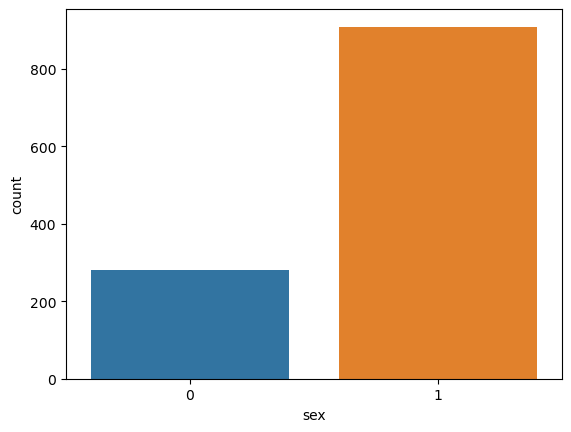

   chest pain type      Ratio
4              625  52.521008
3              283  23.781513
2              216  18.151261
1               66   5.546218


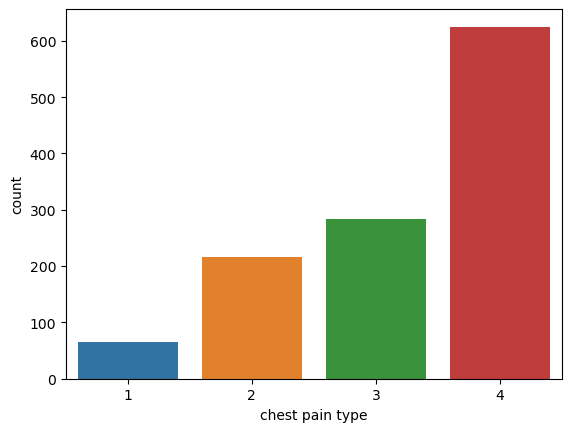

   fasting blood sugar      Ratio
0                  936  78.655462
1                  254  21.344538


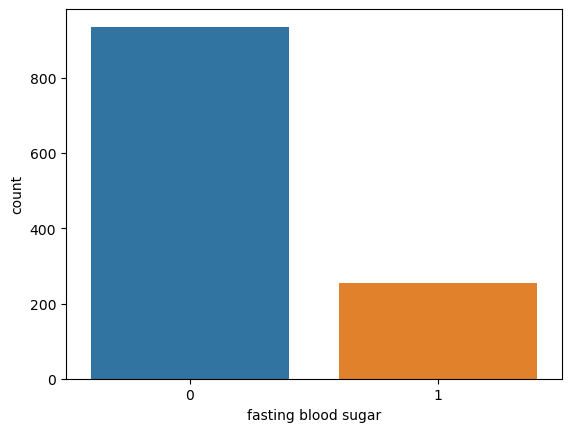

   resting ecg      Ratio
0          684  57.478992
2          325  27.310924
1          181  15.210084


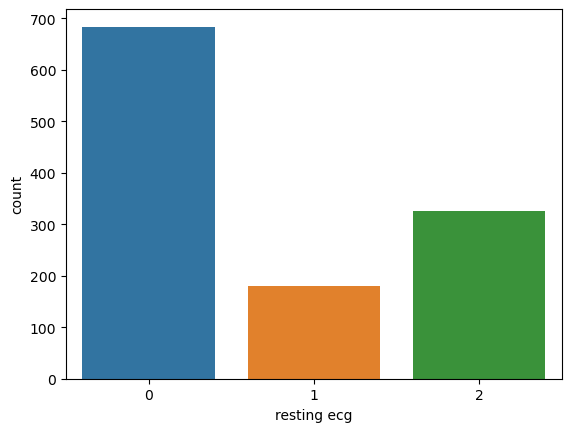

   exercise angina      Ratio
0              729  61.260504
1              461  38.739496


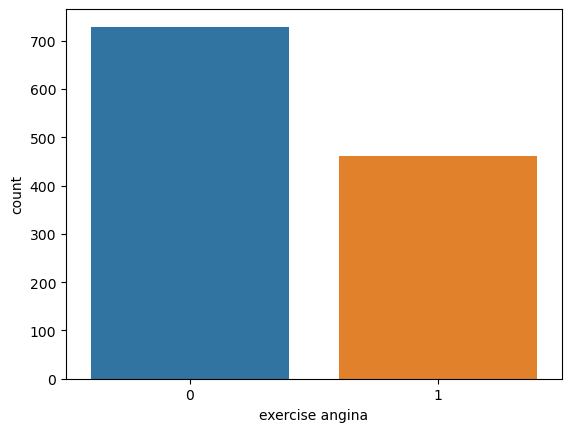

   ST slope      Ratio
2       582  48.907563
1       526  44.201681
3        81   6.806723
0         1   0.084034


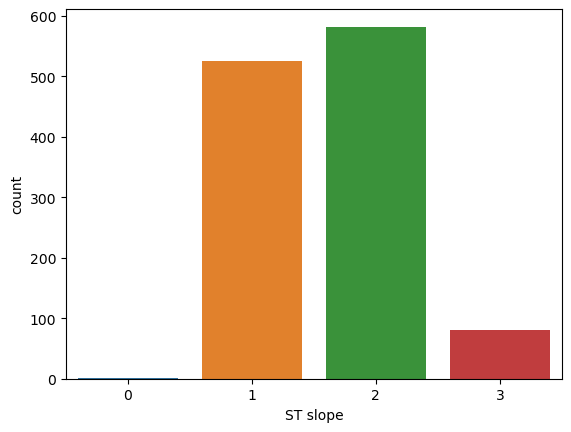

   target      Ratio
1     629  52.857143
0     561  47.142857


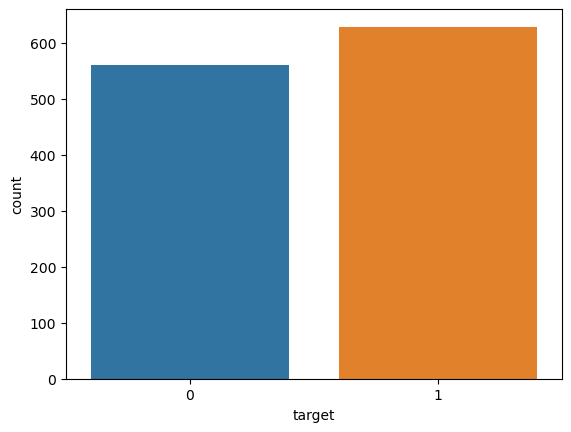

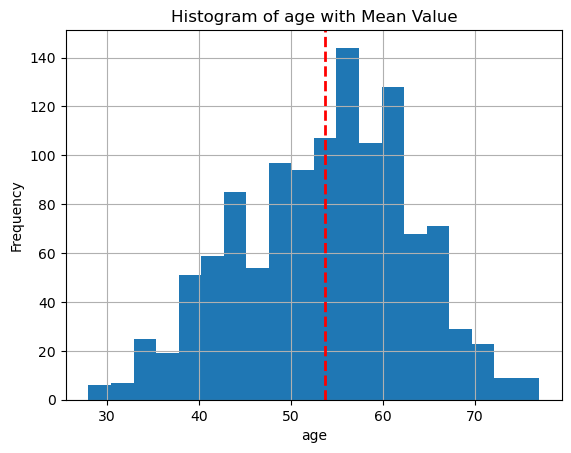

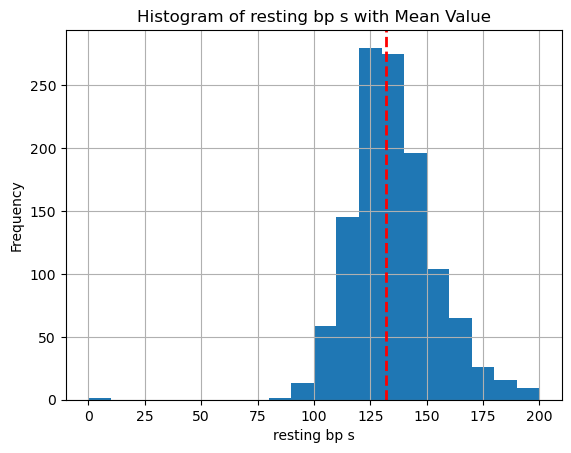

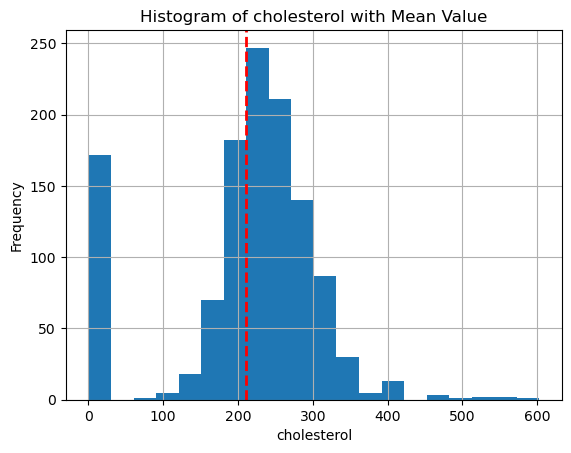

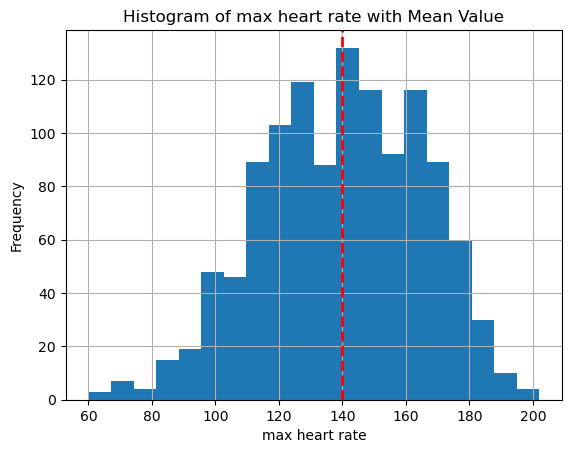

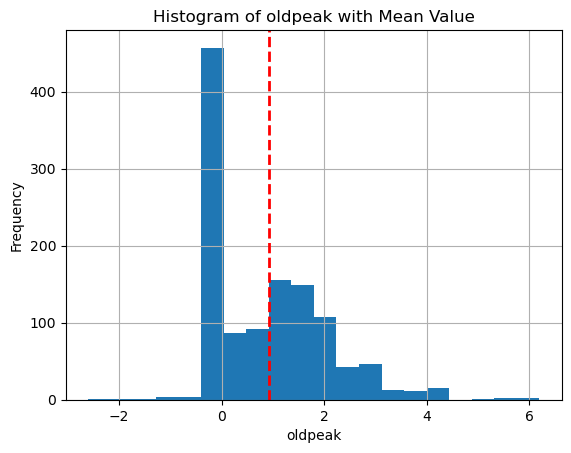

In [21]:
#Görselleştirme
def cat_summary(dataframe, col_name, plot=True):  #her bir kategoriye ait gözlem sayılarını ve bu sayıların toplam gözlem sayısına oranını 
    print(pd.DataFrame({col_name:dataframe[col_name].value_counts(), 
                        "Ratio":100 * dataframe[col_name].value_counts()/len(dataframe)}))
    
    if plot:
        sns.countplot(x=dataframe[col_name],data=dataframe)  #her bir kategorinin sıklığını görselleştirir.
        plt.show(block=True)
        
for col in cat_cols:
    cat_summary(df,col)
    
def hist_num_columns_show(dataframe,num_column):
    mean_value = dataframe[num_column].mean()
    dataframe[num_column].hist(bins=20)
    plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=2)  #ortalama
    plt.xlabel(num_column)
    plt.ylabel("Frequency")
    plt.title(f'Histogram of {num_column} with Mean Value')
    plt.show(block=True)
    
for num_col in num_cols:
    hist_num_columns_show(df,num_col)
    
    
#Özelliklerin toplam değerleri ve sıklığı grafiklerle gösteriliyor
#Histogram grafiklerinde verilere ait ortalama değerler kırmızı çizgiyle belirtiliyor   

<function matplotlib.pyplot.show(close=None, block=None)>

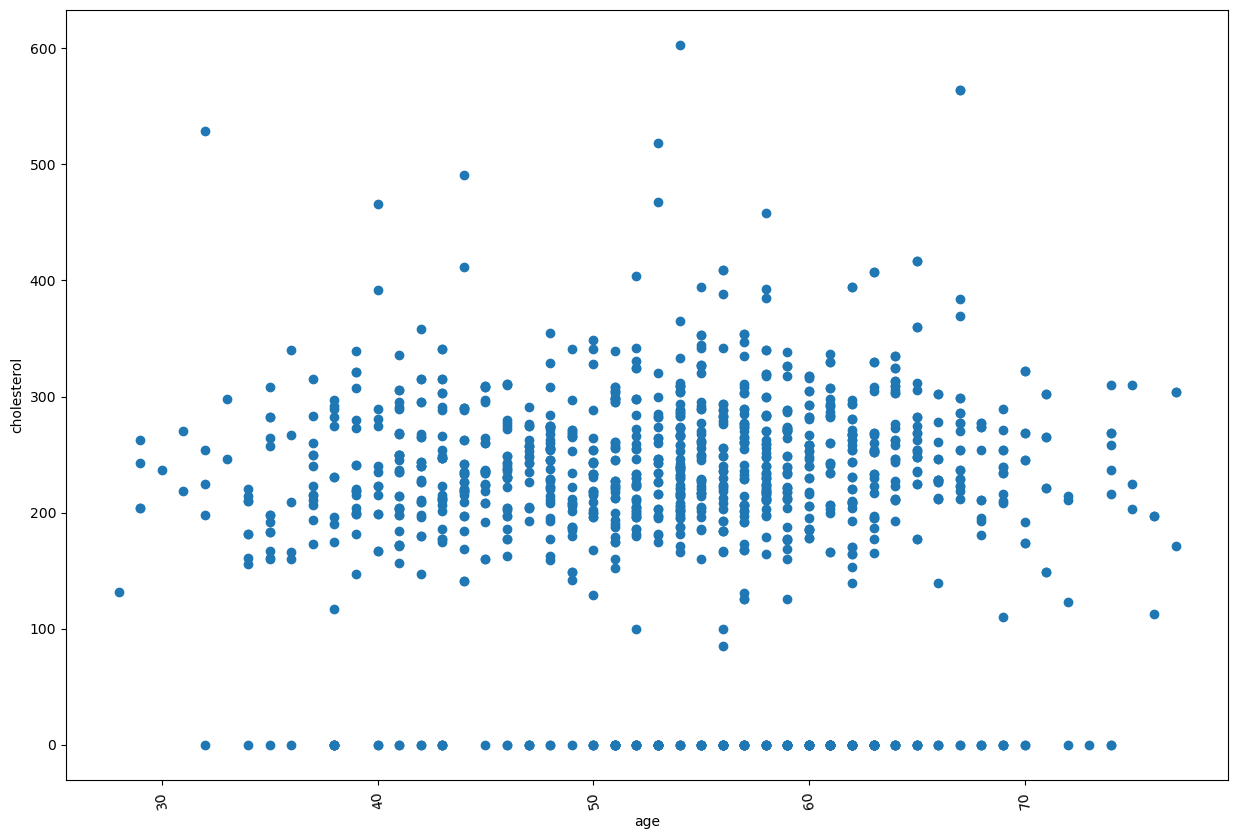

In [26]:
plt.figure(figsize=(15,10))
plt.scatter("age","cholesterol",data=df)
plt.xticks(rotation=100)
plt.xlabel("age")
plt.ylabel("cholesterol")
plt.show
#Bu grafikte yaşa göre kolesterol değerlerini görmekteyiz. 
#Genel olarak her yaş aralığında kolesterol değeri 200 ile 400 arasında sıklaşıyor.

<function matplotlib.pyplot.show(close=None, block=None)>

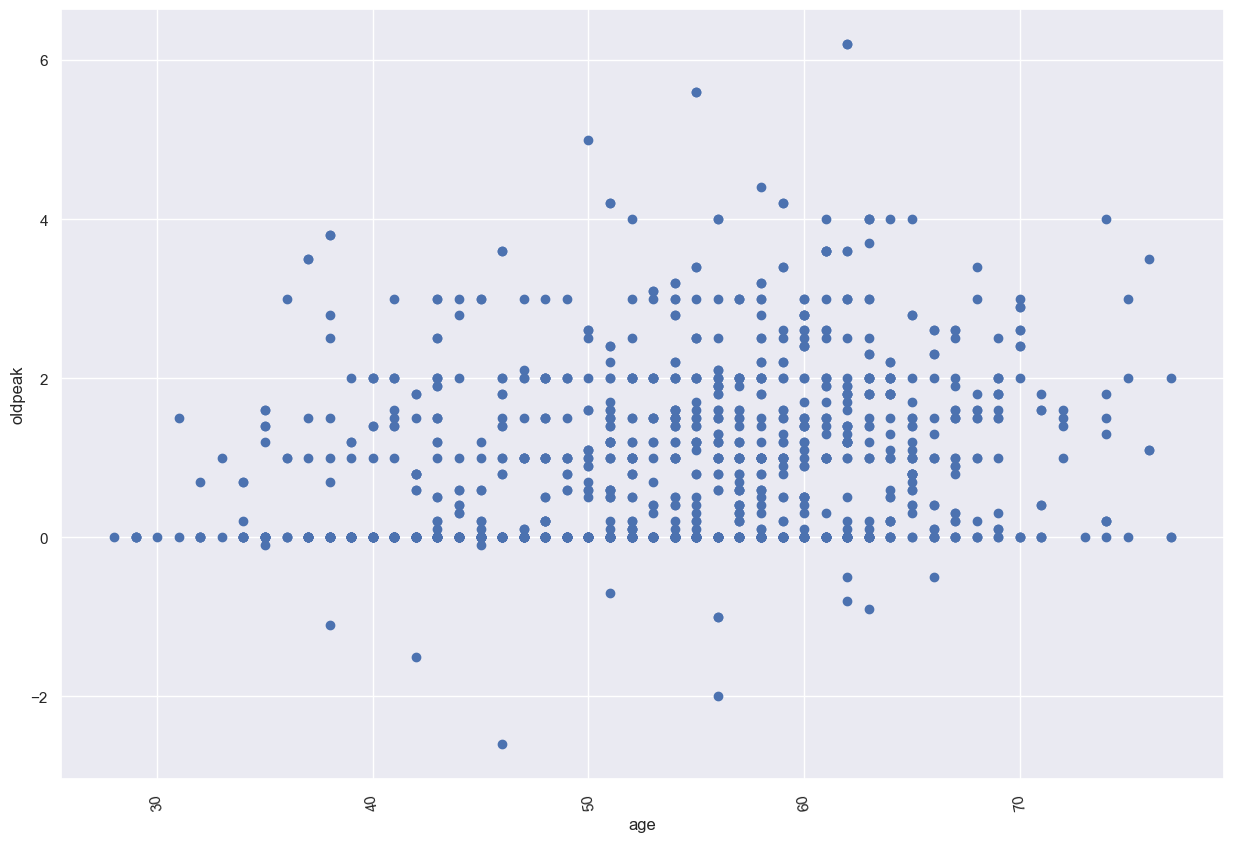

In [49]:
plt.figure(figsize=(15,10))
plt.scatter("age","oldpeak",data=df)
plt.xticks(rotation=100)
plt.xlabel("age")
plt.ylabel("oldpeak")
plt.
#oldpeak değerinde, yaşa göre dağılımda 50-70 aralığında sıklaşma görmekteyiz.

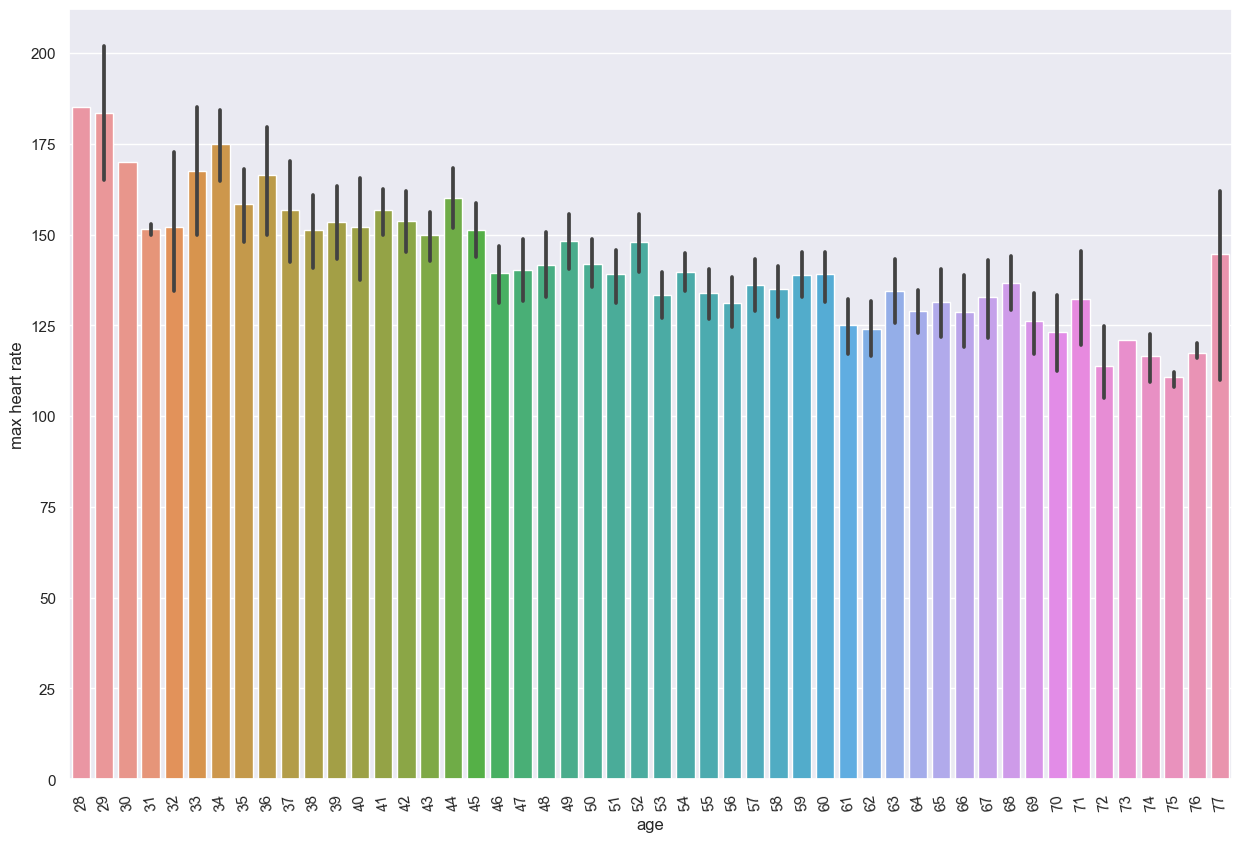

In [51]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x="age",y="max heart rate",data=df)
plt.xticks(rotation=100);

#Max kalp atışı faktörünün yaş arttıkça azaldığını gözlemliyoruz.

In [32]:
fig=px.bar(df,x="age",y="resting bp s",color="age")
fig.show()

#dinlenme kan basıncı değerlerinin yaşa göre dağılımını görüyoruz.

In [35]:
fig=px.scatter(df,x="age",y="oldpeak")
fig.show()

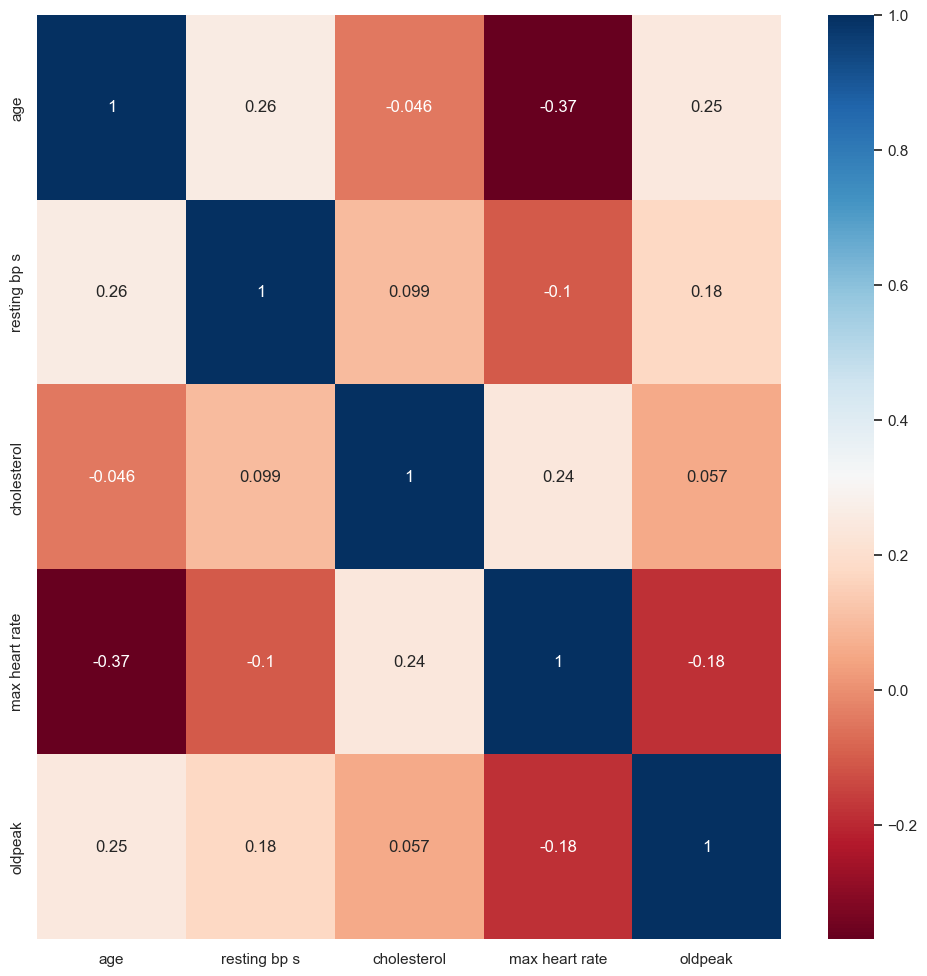

In [36]:
#KORELASYON
#Korelasyon katsayısı 1'e yakınsa güçlü pozitif ilişki,
#-1'e yakınsa güçlü negatif ilişki, 0'a yakınsa ilişkisiz oldukları anlamına gelir.

corr=df[num_cols].corr()
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(corr,cmap="RdBu",annot=True)
plt.show()

#Değişkenler arasındaki katsayılara bakıldığında tüm katsayıların 0'a yakın olduğunu görmekteyiz. Buna göre değişkenler arasında 
#güçlü bir ilişki olmadığını söyleyebiliriz.

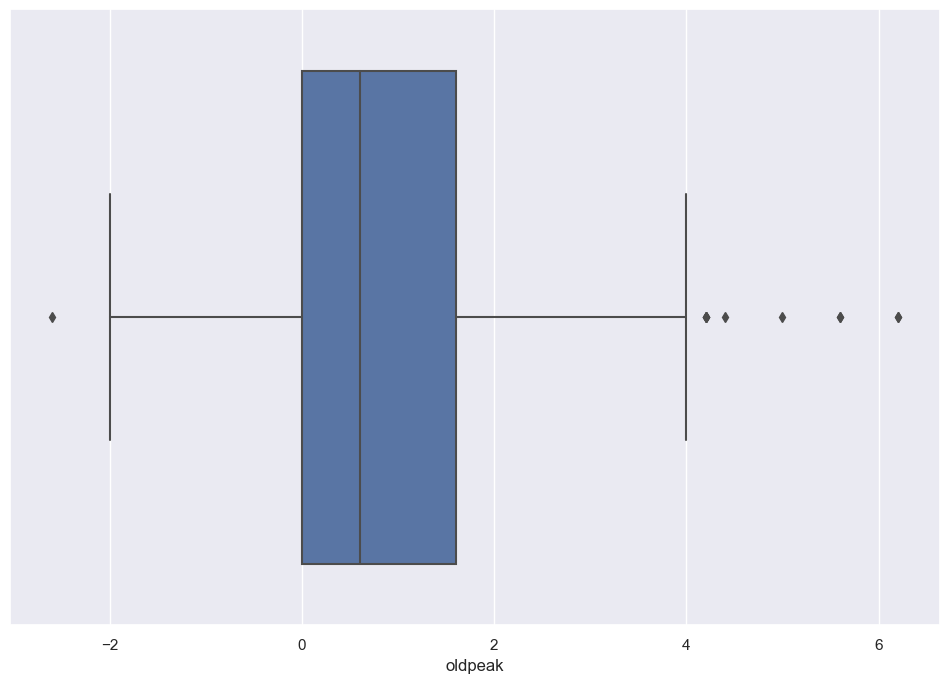

In [40]:
#Aykırı değer tespiti

plt.figure(figsize=(12,8))
sns.boxplot(x=df["oldpeak"])
plt.show(block=True)

#oldpeak değerinde aykırı değerler bulunduğunu görmekteyiz.

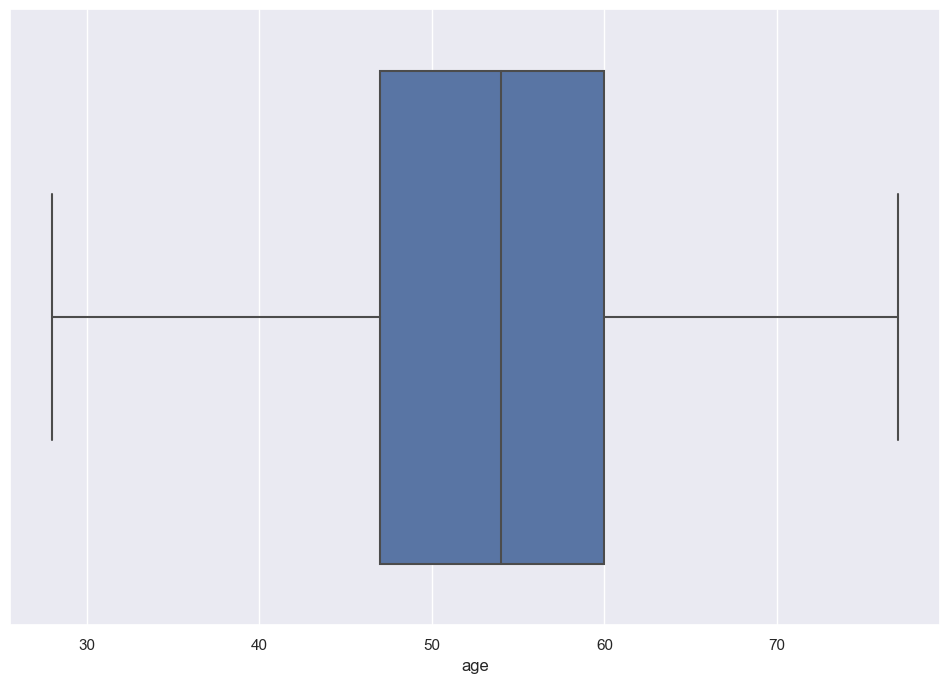

In [52]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df["age"])
plt.show(block=True)
#yaş değişkeninde aykırı bir değer olmadığını görmekteyiz.

In [41]:
#outlier için alt ve üst limit
def outlier_thresholds(dataframe:pd.DataFrame,col_name:str,q1=0.25, q3=0.75):
    quartile1=dataframe[col_name].quantile(q1)
    quartile3=dataframe[col_name].quantile(q3)
    interquantile_range=quartile3-quartile1
    up_limit=quartile3 +1.5*interquantile_range
    low_limit=quartile1 -1.5*interquantile_range
    return low_limit,up_limit

In [42]:
outlier_thresholds(df,"oldpeak")
#oldpeak değişkeni için -2.4'ten küçük değerler ve 4'ten büyük değerler aykırı değerlerdir.

(-2.4000000000000004, 4.0)

In [43]:
#outlier olup olmama kontrolü

def check_outlier(dataframe:pd.DataFrame,col_name:str):
    low_limit,up_limit=outlier_thresholds(dataframe,col_name)
    if dataframe[(dataframe[col_name]>up_limit) | (dataframe[col_name]< low_limit)].any(axis=None):
        return True
    else:
        return False

In [45]:
check_outlier(df,"oldpeak")

True

In [46]:
check_outlier(df,"age")

False

In [47]:
#eksik değer var mı
df.isnull().sum()

#verisetinde eksik değer bulunmamaktadır.

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64